In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-19").\
    filter(Measurement.date <= "2017-08-19").all()
results

[('2016-08-19', 0.04),
 ('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-0

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date = [results[0] for prcp_result in results[0:]]
prcp= [results[1] for prcp_result in results[0:]]
precipitation_df= pd.DataFrame(results[0:], columns=['date', 'prcp'] )

# Sort the dataframe by date
precipitation_df.set_index('date', inplace=True, )
precipitation_df

,prcp
date,
2016-08-19,0.04
2016-08-20,0.00
2016-08-21,0.12
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [12]:
#Setting NaN values to zero in prcp column
precipitation_df["prcp"].fillna(0,inplace=True)

precipitation_df

,prcp
date,
2016-08-19,0.04
2016-08-20,0.00
2016-08-21,0.12
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


### Percipitation Plot

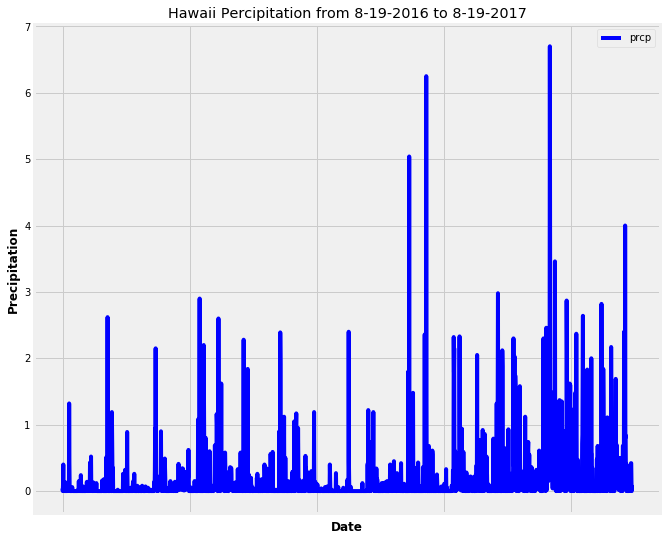

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

#plot the data
prec_plot = precipitation_df.plot(figsize = (10, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Hawaii Percipitation from 8-19-2016 to 8-19-2017")
plt.savefig('graphs/Hawaii Precipitation from 8-19-2016 to 8-19-2017.png')
plt.show()

## Calculating Precipitation Data Stats

In [14]:

#show short statistical analysis for data
precipitation_df.describe()


,prcp
count,2240.000000
mean,0.163906
std,0.446896
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


## Station Analysis

In [15]:
# How many stations are available in this dataset?

station_count = session.query(Station.id).count()
print(f"Number of stations avaiable in dataset are: {station_count}")


Number of stations avaiable in dataset are: 9


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
print(f"The most active station is: {most_active_stations}")

The most active station is: ('USC00519281', 2772)


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active_tobs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-19", Measurement.date <="2017-08-19").\
all()

print(f"For station id USC00519281, the lowest, highest, and average recorded temps are: {most_active_tobs}")

For station id USC00519281, the lowest, highest, and average recorded temps are: [(59.0, 83.0, 73.17696629213484)]


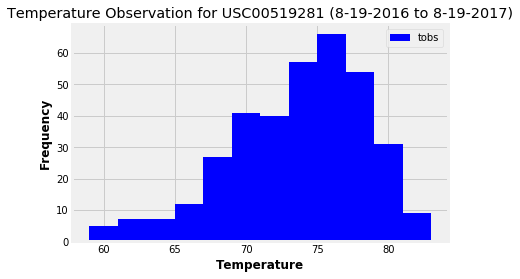

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observation  = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-19", Measurement.date <="2017-08-19").\
all()



temperatures = [temp[0] for temp in temp_observation]

plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for USC00519281 (8-19-2016 to 8-19-2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)
plt.savefig('graphs/Temperature Obsersvation for USC00519281 from 8-19-2016 to 8-19-2017.png')
plt.show()

